#  <font color='blue'  >Hw4<font/> 
### Alejandro Moscoso 332336908
### Shiraz benyatov 313592958

In [212]:
import numpy as np
import pandas as pd
np.random.seed=50
from sklearn import decomposition

from time import time
import matplotlib.pyplot as plt
from  matplotlib.pyplot import figure
import pylab as pl
import matplotlib.image as mpimg
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter
from sklearn import manifold, datasets,neighbors,decomposition
from sklearn.decomposition import KernelPCA

In [264]:


def pca(X_std,d):
#     print (np.cov(X_std.T))
    mean_vec = np.mean(X_std, axis=0)
    cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
    eig_vals, eig_vecs = np.linalg.eig(cov_mat)  
    eig_pairs = sorted([x for x in zip(np.abs(eig_vals), eig_vecs)],key= lambda x :x[0], reverse=True)
#     print(eig_pairs)
    w =np.matrix([eig_pairs[i][1] for i in range(d)]).T
#     print(w)
    a =np.dot( X_std,w)
    return a


pd.DataFrame(pca(x.T,2))

,0,1
0,0.986803,8.128505
1,5.226851,1.497382
2,4.075277,2.031598
3,5.206404,7.086923
4,4.078708,4.550649
5,4.033100,9.015675


In [190]:
x= np.random.randint(0,10,size=[5,6])
data = pd.DataFrame(x.T)
data = (data - data.mean())/data.std()
data


,0,1,2,3,4
0,0.866703,-0.299021,-0.129099,-1.375496,0.579674
1,-0.433351,-1.375496,1.032796,0.777454,-0.115935
2,-0.108338,-0.657846,0.645497,0.418629,-0.811543
3,0.541689,1.136279,0.645497,0.059804,-0.115935
4,-1.733406,1.136279,-1.678293,-1.016671,-1.159347
5,0.866703,0.059804,-0.516398,1.136279,1.623086


In [210]:
pd.DataFrame(decomposition.PCA(n_components=2).fit_transform(data))

,0,1
0,-0.129213,-0.932522
1,-1.125571,1.507799
2,-0.352228,1.193725
3,-0.076204,-0.427986
4,3.036929,0.033967
5,-1.353714,-1.374983


In [265]:

pd.DataFrame(pca(data,2))

,0,1
0,1.116063,-0.068575
1,0.739820,0.712199
2,0.295276,-0.268730
3,0.077117,-0.946589
4,-2.290969,-0.572913
5,0.062693,1.144608


In [262]:
# np.dot(np.matrix([y[i][1] for i in range(2)]).T, y)

In [253]:



n_points = 1000
X, color = datasets.make_s_curve(n_points, random_state=0)
plots={}
plots["X2_PCA"] = decomposition.PCA(n_components=2).fit_transform(X)
for gamma in [ 10, 5,1,0.1]:
    plots[f'X_kpca_gamma_{gamma}'] = KernelPCA(kernel="rbf", fit_inverse_transform=True, gamma=gamma).fit_transform(X)

plots[f'X_kpca_linear'] = KernelPCA(kernel="linear", fit_inverse_transform=True, gamma=gamma).fit_transform(X)
#gamma = 1 / 2 sigma ^2



In [256]:
plots_1={}
plots_1['X_kpca_cosine'] = KernelPCA(kernel="cosine").fit_transform(X)
plots_1[f'X_kpca_poly'] = KernelPCA(kernel="poly", fit_inverse_transform=True, gamma=1).fit_transform(X)



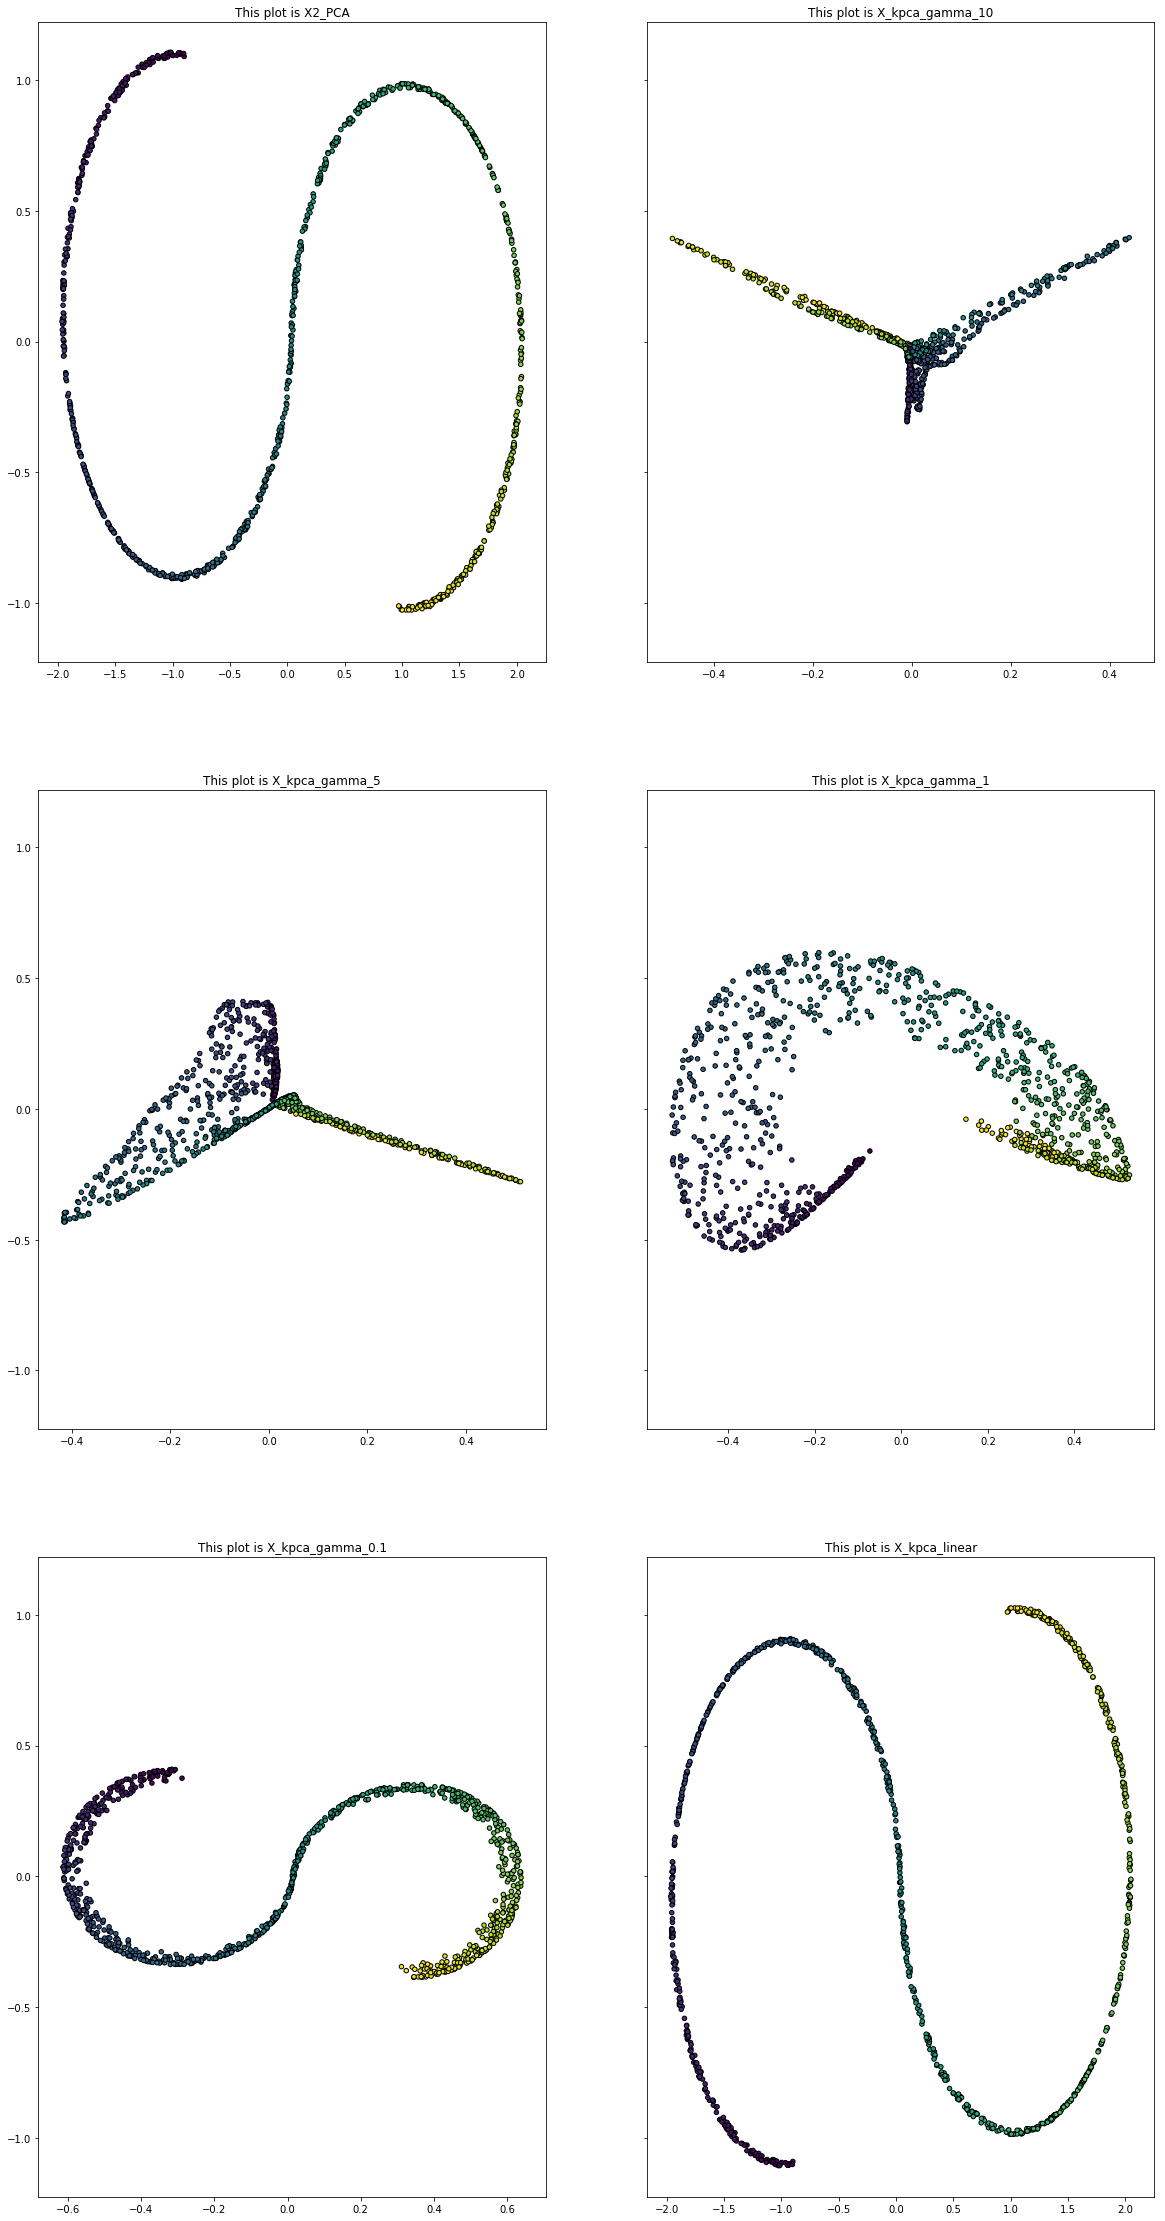

In [254]:

fig, ax = plt.subplots(3, 2, sharey=True, figsize=[20,40])
ax=np.reshape(ax,-1)

for index, plot in enumerate(plots.keys()):
    ax[index].scatter(plots[plot][:, 0], plots[plot][:, 1],c=color,
#                       title=f"This plot is {plot}",
                    
                s=20, edgecolor='k')
    ax[index].set_title(f"This plot is {plot}")



plt.show()

## conclusions :
- After running normal Pca we fount out that we lost most information on the process.
- We run **KPCA** with different $\gamma$ values to find the obtimal value. for $\gamma~= ~ 1$ we soud that the projection represent the original fold better than different values of $\gamma$ when $\gamma ~ = ~1/{2\sigma^2}$ 


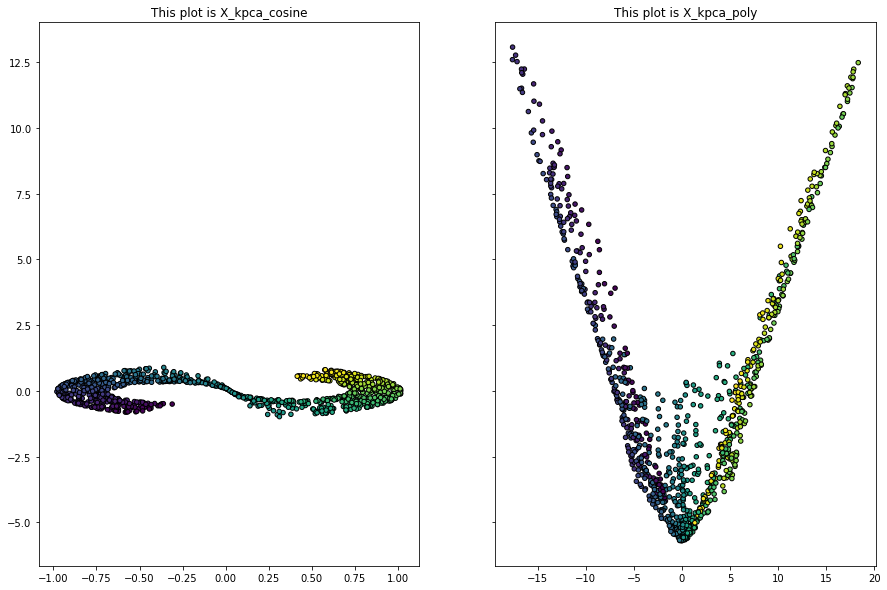

In [261]:
fig, ax = plt.subplots(1, 2, sharey=True, figsize=[15,10])
ax=np.reshape(ax,-1)

for index, plot in enumerate(plots_1.keys()):
    ax[index].scatter(plots_1[plot][:, 0], plots_1[plot][:, 1],c=color,  s=20, edgecolor='k')
    ax[index].set_title(f"This plot is {plot}")



plt.show()

## conclusion 
-The Poly and cosine K-PCA are not as good as Gausian with $\sigma = 1$

Text(0.5,0.92,'Original data')

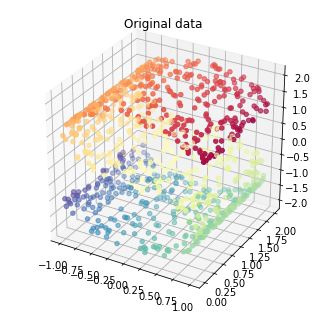

In [263]:
fig = plt.figure(figsize = (12,12))

ax = fig.add_subplot(221, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax.set_title("Original data")